In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [3]:

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [4]:
import seaborn as sns
sns.set_style("whitegrid")

In [5]:
state = 'TX'

In [6]:
file_symptoms_train = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_joined_selected_columns_use_max_scale_one_df_train.fea'

noun_sentence_state_train = pd.read_feather(file_symptoms_train)

FileNotFoundError: [Errno 2] Failed to open local file 'comments/raw_comments/agent_comments_TX_filtered_final_joined_selected_columns_use_max_scale_one_df_train.fea'. Detail: [errno 2] No such file or directory

In [ ]:
for col in noun_sentence_state_train.columns:
    print(col)

In [7]:
file_symptoms_test = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_joined_selected_columns_use_max_scale_one_df_test.fea'
noun_sentence_state_test = pd.read_feather(file_symptoms_test)


FileNotFoundError: [Errno 2] Failed to open local file 'comments/raw_comments/agent_comments_TX_filtered_final_joined_selected_columns_use_max_scale_one_df_test.fea'. Detail: [errno 2] No such file or directory

In [8]:
noun_sentence_state_test_transdate_train = noun_sentence_state_train.groupby('Transdate').mean()[['avmerror']].reset_index()
noun_sentence_state_test_transdate_train = noun_sentence_state_test_transdate_train.rename(columns={"avmerror": "avmerror_mean"})

NameError: name 'noun_sentence_state_train' is not defined

In [9]:
noun_sentence_state_test_transdate_test = noun_sentence_state_test.groupby('Transdate').mean()[['avmerror']].reset_index()
noun_sentence_state_test_transdate_test = noun_sentence_state_test_transdate_test.rename(columns={"avmerror": "avmerror_mean"})

NameError: name 'noun_sentence_state_test' is not defined

In [11]:
noun_sentence_state_train = noun_sentence_state_train.merge(noun_sentence_state_test_transdate_train,
                                                         how='left', left_on='Transdate', right_on='Transdate')

In [12]:
noun_sentence_state_test = noun_sentence_state_test.merge(noun_sentence_state_test_transdate_test,
                                                         how='left', left_on='Transdate', right_on='Transdate')

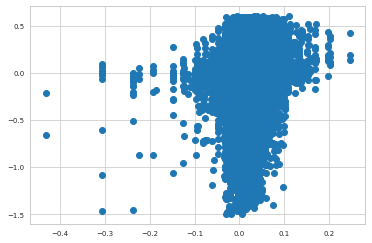

In [13]:

plt.plot(noun_sentence_state_train.avmerror_mean.values,noun_sentence_state_train.avmerror.values,'o')


In [14]:
selcted_columns = ['cbsa', 'Transdate', 
       'cj_living_area', 'census_tract', 'zip', 
       'avmValue', 
       'AVM_Error_Indicators_0', 'AVM_Error_Indicators_1',
       'AVM_Error_Indicators_2', 'AVM_Error_Indicators_3',
       'AVM_Error_Indicators_4', 'AVM_Error_Indicators_5',
       'AVM_Error_Indicators_6', 'AVM_Error_Indicators_7',
       'AVM_Error_Indicators_8', 'AVM_Error_Indicators_9',
       'AVM_Error_Indicators_10', 'AVM_Error_Indicators_11',
       'AVM_Error_Indicators_scale', 'AVM_Error_Indicators_scale_inverse',
       'Listing_Error_Indicators_0', 'Listing_Error_Indicators_1',
       'Listing_Error_Indicators_2', 'Listing_Error_Indicators_3',
       'Listing_Error_Indicators_4', 'Listing_Error_Indicators_5',
       'Listing_Error_Indicators_6', 'Listing_Error_Indicators_7',
       'Listing_Error_Indicators_8', 'Listing_Error_Indicators_9',
       'Listing_Error_Indicators_10', 'Listing_Error_Indicators_11',
       'AVM_Error_Indicators_0_max_value',
       'AVM_Error_Indicators_0_min_value',
       'AVM_Error_Indicators_0_max_indicator',
       'AVM_Error_Indicators_0_min_indicator',
       'AVM_Error_Indicators_0_diff_indicator',
       'AVM_Error_Indicators_0_diff_value', 'AVM_Error_Indicators_0_mean','avmerror_mean']

In [15]:
selcted_columns = selcted_columns + list(noun_sentence_state_train.columns[51:-1])

In [16]:
symptoms_df = noun_sentence_state_train.loc[:,selcted_columns]
symptoms_df_test = noun_sentence_state_test.loc[:,selcted_columns]

In [17]:
noun_sentence_state_train['category_predictand'] = 0
noun_sentence_state_train.loc[noun_sentence_state_train['avmerror']>=0.,'category_predictand'] = 1

In [18]:
noun_sentence_state_test['category_predictand'] = 0
noun_sentence_state_test.loc[noun_sentence_state_test['avmerror']>=0.,'category_predictand'] = 1

In [19]:
noun_sentence_state_train.Transdate

0         20180910.0
1         20201111.0
2         20201120.0
3         20180829.0
4         20180309.0
             ...    
193289    20201007.0
193290    20191210.0
193291    20210217.0
193292    20180424.0
193293    20190731.0
Name: Transdate, Length: 193294, dtype: float64

In [20]:
Predictors = symptoms_df.to_numpy()
X_test = symptoms_df_test.to_numpy()
X_train = Predictors
predictand = noun_sentence_state_train.category_predictand.values
y_train = predictand
y_test = noun_sentence_state_test.category_predictand.values

In [21]:

from lightgbm import LGBMClassifier
#model = LGBMClassifier(max_depth =50)  #0.6408242829295461

# model = LGBMClassifier(max_depth = 20, n_estimators = 100, num_leaves = 1000)
model = LGBMClassifier(max_depth = 30, n_estimators = 100, num_leaves = 400)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
predictions_train = model.predict(X_train)
predictions_train_prob = model.predict_proba(X_train)


In [ ]:
cm_train = confusion_matrix(y_train, predictions_train)
print(cm_train)

In [ ]:
accuracy_score(y_train, predictions_train)

In [ ]:
print(model.get_params(deep=True))

In [ ]:
predictions_test = model.predict(X_test)
predictions_test_prob = model.predict_proba(X_test)

In [ ]:
cm_test = confusion_matrix(y_test, predictions_test)
print(cm_test)

In [ ]:
accuracy_score(y_test, predictions_test)

In [ ]:
import joblib
filename = 'LGBM_binaryclass_firstStage_'+state+'.sav'
joblib.dump(model,filename)

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)
features = selcted_columns

In [ ]:
X_train[:, indices[-7]]

In [ ]:
for element in np.array(features)[indices]:
    print(element)

## Regression

In [22]:
y_train_regressor = noun_sentence_state_train.avmerror.values

In [23]:

from lightgbm import LGBMRegressor
#model = LGBMClassifier(max_depth =50)  #0.6408242829295461
#model_regressor = LGBMRegressor(max_depth = 20, n_estimators = 100, num_leaves = 1000) #'Good' 0.0753091391900749

model_regressor = LGBMRegressor(max_depth = 10, n_estimators = 150, num_leaves = 700, colsample_bytree=0.4) 

#model_regressor = LGBMRegressor(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators = 150, num_leaves = 700, colsample_bytree=0.4) 

In [24]:
model_regressor.fit(X_train, y_train_regressor)

LGBMRegressor(colsample_bytree=0.4, max_depth=10, n_estimators=150,
              num_leaves=700)

In [25]:
predictions_train_Regressor = model_regressor.predict(X_train)

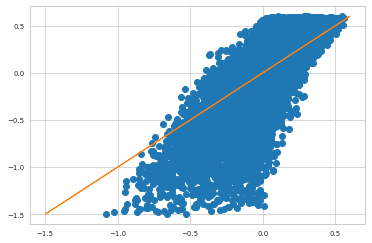

In [26]:
plt.plot(predictions_train_Regressor, y_train_regressor, 'o')
plt.plot(y_train_regressor, y_train_regressor)

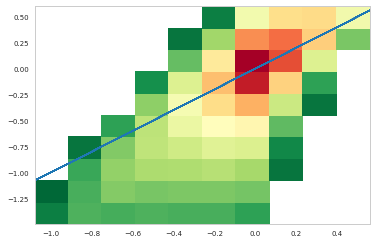

In [27]:
from matplotlib import colors
plt.hist2d(predictions_train_Regressor, y_train_regressor, bins=10, cmap = "RdYlGn_r",
           norm = colors.LogNorm())
plt.plot(y_train_regressor,y_train_regressor)

In [28]:
predictions_test_Regressor = model_regressor.predict(X_test)

In [29]:
y_test_regressor = noun_sentence_state_test.avmerror.values

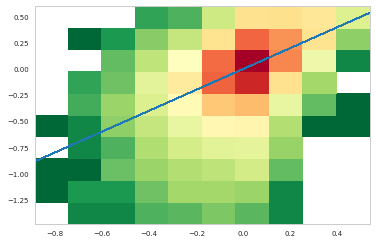

In [30]:
plt.hist2d(predictions_test_Regressor, y_test_regressor, bins=10, cmap = "RdYlGn_r",
           norm = colors.LogNorm())
plt.plot(y_test_regressor,y_test_regressor)

In [31]:
avmValue_test = noun_sentence_state_test['avmValue']
avmValue_train = noun_sentence_state_train['avmValue']

transprice_test = noun_sentence_state_test['Transprice']
transprice_train = noun_sentence_state_train['Transprice']

predictions_test_valueR = avmValue_test/(1-predictions_test_Regressor)
predictions_train_valueR = avmValue_train/(1-predictions_train_Regressor)

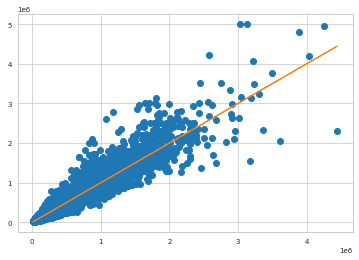

In [32]:


print('') 
fig = plt.figure()
plt.plot(predictions_test_valueR, 
     transprice_test,'o')
plt.plot(predictions_test_valueR,predictions_test_valueR)


In [33]:
print('') 
print('Testing')
print(np.mean(np.abs(transprice_test-predictions_test_valueR)/\
          (transprice_test)))
print(np.mean(np.abs(transprice_test - avmValue_test)/\
              (transprice_test)))

print('') 
print('Training') 
print(np.mean(np.abs(transprice_train-predictions_train_valueR)/\
          (transprice_train)))
print(np.mean(np.abs(transprice_train - avmValue_train)/\
              (transprice_train)))    


Testing
0.10060815707066105
0.11482542789285947

Training
0.08765564973659257
0.11497275549046698


In [34]:
import joblib
filename = 'LGBM_regressor_firstStage_'+state+'.sav'
joblib.dump(model_regressor,filename)

['LGBM_regressor_firstStage_NC.sav']

In [35]:
from scipy.interpolate import interp1d
def q2q(dataset1,dataset2):
    percentiles1 = np.percentile(dataset1,np.arange(1,98,1))
    percentiles2 = np.percentile(dataset2,np.arange(1,98,1))
    f_interpol = interp1d(percentiles1, percentiles2,fill_value="extrapolate")
    dataset1_mod = f_interpol(dataset1)
    return f_interpol, dataset1_mod

In [36]:
f_interpol, predictions_train_Regressor_mod  = q2q(predictions_train_Regressor,y_train_regressor)

In [37]:
predictions_test_Regressor_mod = f_interpol(predictions_test_Regressor)

In [38]:

predictions_test_valueR_mod = avmValue_test/(1-predictions_test_Regressor_mod)
predictions_train_valueR_mod = avmValue_train/(1-predictions_train_Regressor_mod)

In [39]:
print('') 
print('Testing')
print(np.mean(np.abs(transprice_test-predictions_test_valueR_mod)/\
          (transprice_test)))
print(np.mean(np.abs(transprice_test - avmValue_test)/\
              (transprice_test)))

print('') 
print('Training') 
print(np.mean(np.abs(transprice_train-predictions_train_valueR_mod)/\
          (transprice_train)))
print(np.mean(np.abs(transprice_train - avmValue_train)/\
              (transprice_train)))    


Testing
0.12107484909308472
0.11482542789285947

Training
0.09952009806902337
0.11497275549046698


In [42]:
importances_regressor = model_regressor.feature_importances_
indices_regressor = np.argsort(importances_regressor)
features_regressor = selcted_columns

In [43]:
indices_regressor

array([3462, 4434, 4432, ...,    4,    5,    3])

In [44]:
X_train[:, indices_regressor[-2]]

array([319889.33, 564959.64, 321520.71, ..., 1289564.71, 445301.99,
       288998.75], dtype=object)

In [45]:
for element in np.array(features_regressor)[indices_regressor]:
    print('"'+element+'",')

"full apartment",
"rock walls",
"gourmet kitchen wgas cooktop",
"large wi closet",
"bedroom design",
"perfect yard",
"great country",
"bath double",
"i485 i85",
"ceilings family",
"high efficiency",
"large walk",
"double car",
"retail shops",
"sure fall",
"tile foyer",
"capital boulevard",
"complete wood",
"home market",
"full bed",
"area hallway",
"beautiful carolina weather",
"smoke detectors",
"mins i40",
"beautiful trey",
"guest bedrooms",
"brick construction",
"natural area",
"beautiful chandelier",
"luxurious master",
"den wet",
"room whardwoods",
"gracious bedrooms",
"privacy serenity",
"office craft room",
"ml laundry",
"lots outdoor space",
"entire 1st floor",
"backs trees",
"perfect place relax",
"flr w",
"fresh market",
"right highway",
"old hvac",
"magnificent home",
"awesome master suite",
"lots wood floors",
"space home",
"sac location",
"porch master bedroom",
"seller pay buyers",
"office bonus room",
"laundry shoot",
"computer room",
"royal oaks building group",
"master

"minutes brier creek",
"tile fl",
"solid counters",
"room need",
"sunset ridge",
"convenient rtp duke",
"state art fitness center",
"additional square",
"main street waynesville",
"clean whistle",
"home spotless",
"1st flr",
"classic brick home",
"convenient everywhere",
"sense privacy",
"clt airport",
"hardwoods lr",
"gr room",
"baptist hospital",
"rdu rtp",
"whole home",
"stairs lead",
"plenty yard",
"davidson county",
"open entry",
"floor mbr",
"home backs woods",
"large picture window",
"park mall",
"fault seller",
"busy day",
"new stainless refrigerator",
"inviting family room",
"virtual tour",
"nice size yard",
"cook kitchen",
"large kitchen area",
"minutes city",
"comfortable living",
"dont pass",
"brick custom",
"additional bedrooms loft",
"2bath home",
"kitchen with tile",
"separate rooms",
"sight unseen",
"current appraisal",
"mere minutes",
"basement lots potential",
"open view",
"usable space",
"barstool area",
"parklike backyard",
"island with breakfast",
"double bowl vani

"built in china cabinet",
"boat access",
"large private bath",
"triangle towne center",
"grt room wfp",
"central fireplace",
"lots storage areas",
"northern schools",
"open porch",
"clean carpets",
"stand shower",
"china cabinet",
"bonusmedia room",
"kitchen wgas stove",
"area family room",
"governors club",
"sun valley",
"bedroom septic system",
"small family",
"upstairs new carpet",
"carolina trace",
"double carport",
"premium lot",
"lots builtins",
"lot level",
"laundry room utility",
"upstairs features",
"master suite his her closets",
"private bonus room",
"expandable space",
"story w",
"neighborhood sidewalks",
"cool breezes",
"backyard wmature trees",
"community garden",
"bay wndw",
"kitchen tons storage",
"convenient uncc",
"amenity center",
"pool comm",
"expansive master suite",
"countertop space",
"knightdale station park",
"room w chair rail",
"desirable ranch",
"home awesome",
"nice size master bedroom",
"large owners suite",
"bedroom ranch",
"ranch basement",
"loads cabine

"pool deck",
"garden window",
"right places",
"resort style pool",
"w irrigation",
"perfect play room",
"counter tops",
"comparable purposes",
"wont market",
"extra touches",
"minutes grocery",
"dry basement",
"new tile",
"medical care",
"reverse osmosis",
"min drive",
"new countertops",
"custom blt",
"clubhouse tennis courts",
"beautiful grounds",
"scenic pond",
"cream puff",
"porch master",
"hardwoods gr",
"whole house audio",
"bay deluxe bath",
"artist studio",
"moment walk front door",
"huge new deck",
"custom pool",
"large brick",
"triple wndw",
"custom finishes",
"country estate",
"custom upgrades",
"hope valley",
"prime raleigh location",
"wu attic",
"hwds throughout",
"bosch dishwasher",
"beautiful countertops",
"low e windows",
"black side side fridge",
"house brand",
"cost incentives",
"completion date october",
"onsite schools",
"home tenant",
"spacious cape cod",
"new exterior",
"popcorn ceilings",
"gas appliances",
"inviting kitchen",
"full charm",
"new sod",
"italian tile

"beautiful pergola",
"womble park",
"30day buyback",
"peaceful community",
"exterior walls",
"click virtual tour",
"nice touch",
"portion property",
"roof brand",
"easy walk pool",
"western school district",
"quality upgrades",
"large family room masonry fireplace",
"cary towne center",
"morning coffee front porch",
"solar panels",
"home wow factor",
"storage needs",
"new arch",
"town oak island",
"tankless h20 heater",
"new hardware",
"b area",
"glass cabinets",
"travertine floors",
"unbelievable value",
"stainless steel appliances pantry",
"multiple outbuildings",
"hickory cabinets",
"tankless wh",
"new cabinet hardware",
"acres homeowner association",
"river arts district",
"large peninsula",
"primary bedroom suite",
"true retreat",
"space home office",
"tile accents",
"coastal lifestyle",
"yard gazebo",
"original list price",
"original moldings",
"fresh updates",
"cameron village",
"frameless shower door",
"homes price range",
"crafts bungalow",
"water view",
"hot spots",
"bathroom

"spacious bonus room",
"super cute",
"home needs",
"needs tender loving care",
"private setting",
"full kitchen",
"new hvac system, new roof",
"room fireplace",
"ice maker",
"bedroom home",
"gorgeous kitchen",
"charming home",
"ground salt water pool",
"large closet",
"huge backyard",
"new carpet bedrooms",
"wood beams",
"huge lot",
"additional bedroom",
"marble counters",
"large deck",
"outdoor kitchen",
"worth look",
"large front porch",
"year round",
"new lvp",
"kitchen stainless appliances",
"agent details",
"fire pit",
"light fixtures",
"new home",
"estate sale",
"large shower",
"open plan",
"spectacular views",
"new vanity",
"guest suite",
"perfect investor",
"chair porch",
"gorgeous home",
"rental history",
"ready personal touch",
"quartz counter tops",
"bathroom home",
"marble tile",
"new floors",
"walkin closet",
"adorable cottage",
"walkin shower",
"rear porch",
"attention detail",
"rare opportunity",
"plantation shutters",
"convenient location",
"yard oasis",
"private estate

In [83]:
# NC

trial_columns = [                "attention investors",
                "separate entrance",
                "fireplace gas logs",
                "oil furnace",
                "comparison purposes",
                "new roof, original hardwood floors",
                "new kitchen",
                "available separate purchase",
                "full bathrooms",
                "breaker box",
                "upper level",
                "gas logs",
                "big water",
                "unique property",
                "laundry area",
                "new bathroom",
                "character charm",
                "new deck",
                "3car garage",
                "washer dryer",
                "spacious backyard",
                "house home",
                "new granite counter tops, original hardwood floors",
                "tons potential",
                "spacious bonus room",
                "super cute",
                "home needs",
                "needs tender loving care",
                "private setting",
                "full kitchen",
                "new hvac system, new roof",
                "room fireplace",
                "ice maker",
                "bedroom home",
                "gorgeous kitchen",
                "charming home",
                "ground salt water pool",
                "large closet",
                "huge backyard",
                "new carpet bedrooms",
                "wood beams",
                "huge lot",
                "additional bedroom",
                "marble counters",
                "large deck",
                "outdoor kitchen",
                "worth look",
                "large front porch",
                "year round",
                "new lvp",
                "kitchen stainless appliances",
                "agent details",
                "fire pit",
                "light fixtures",
                "new home",
                "estate sale",
                "large shower",
                "open plan",
                "spectacular views",
                "new vanity",
                "guest suite",
                "perfect investor",
                "chair porch",
                "gorgeous home",
                "rental history",
                "ready personal touch",
                "quartz counter tops",
                "bathroom home",
                "marble tile",
                "new floors",
                "walkin closet",
                "adorable cottage",
                "walkin shower",
                "rear porch",
                "attention detail",
                "rare opportunity",
                "plantation shutters",
                "convenient location",
                "yard oasis",
                "private estate",
                "main house",
                "private retreat",
                "water heater",
                "private pier",
                "private acres",
                "long range",
                "plaza midwood noda",
                "great opportunity",
                "kitchen bathrooms",
                "original floors",
                "new septic tank",
                "spacious living room",
                "fantastic location",
                "open concept",
                "bonus room",
                "replacement windows",
                "main floor",
                "main level",
                "new laminate",
                "irrigation system",
                "gas stove",
                "white oak floors",
                "full basement",
                "private dock",
                "porch outdoor fireplace",
                "spacious bedrooms",
                "beautiful views",
                "new roof, new stainless steel appliances",
                "floor plan",
                "new heat pump",
                "new cabinets",
                "front porch",
                "double vanity",
                "gas range",
                "time home buyer",
                "brick home",
                "bath home",
                "beautiful custom",
                "great natural light",
                "new granite counter tops, new stainless steel appliances",
                "full baths",
                "inground pool",
                "boat slip",
                "great room",
                "double car garage",
                "new paint",
                "master bath",
                "new vinyl windows",
                "new hot water heater",
                "custom home",
                "brick ranch home",
                "laminate wood floors",
                "great investment",
                "storage building",
                "chefs kitchen",
                "acres land",
                "square feet",
                "master bedroom",
                "perfect starter home",
                "acre lot",
                "new windows",
                "original hardwoods",
                "new carpets",
                "large island",
                "tax value",
                "custom cabinetry",
                "2car garage",
                "master suite w",
                "gourmet kitchen",
                "new roof",
                "fresh paint",
                "full bath home",
                "new hvac system",
                "granite kitchen",
                "stone fireplace",
                "granite counters",
                "quartz countertops",
                "bright open floor plan",
                "new appliances",
                "hot tub",
                "new construction",
                "metal roof",
                "original hardwood floors",
                "new stainless steel appliances",
                "new granite counter tops",
                "Listing_Error_Indicators_7",
                "AVM_Error_Indicators_11",
                "Listing_Error_Indicators_0",
                "Listing_Error_Indicators_9",
                "Listing_Error_Indicators_4",
                "AVM_Error_Indicators_6",
                "Listing_Error_Indicators_5",
                "Listing_Error_Indicators_10",
                "Listing_Error_Indicators_11",
                "AVM_Error_Indicators_scale_inverse",
                "AVM_Error_Indicators_1",
                "Listing_Error_Indicators_2",
                "AVM_Error_Indicators_8",
                "AVM_Error_Indicators_4",
                "Listing_Error_Indicators_6",
                "AVM_Error_Indicators_5",
                "Listing_Error_Indicators_1",
                "Listing_Error_Indicators_3",
                "AVM_Error_Indicators_scale",
                "Listing_Error_Indicators_8",
                "AVM_Error_Indicators_10",
                "AVM_Error_Indicators_3",
                "AVM_Error_Indicators_7",
                "AVM_Error_Indicators_2",
                "AVM_Error_Indicators_0",
                "AVM_Error_Indicators_9",
                "cbsa",
                "AVM_Error_Indicators_0_min_indicator",
                "AVM_Error_Indicators_0_max_value",
                "AVM_Error_Indicators_0_max_indicator",
                "AVM_Error_Indicators_0_diff_value",
                "AVM_Error_Indicators_0_diff_indicator",
                "AVM_Error_Indicators_0_min_value",
                "avmerror_mean",
                "Transdate",
                "AVM_Error_Indicators_0_mean",
                "cj_living_area",
                "zip",
                "avmValue",
                "census_tract"]


In [41]:
# GA

trial_columns = [    "new kitchen cabinets",
        "custom closet",
        "quiet neighborhood",
        "gorgeous hardwood floors",
        "original hardwood floors",
        "inlaw suite",
        "spray foam insulation",
        "deep water",
        "due diligence",
        "cash buyer",
        "private acres",
        "walkin closet",
        "brick ranch home",
        "amazing home",
        "two car garage",
        "fantastic location",
        "new appliances",
        "open concept",
        "huge deck",
        "full baths",
        "square feet",
        "custom home",
        "water heater",
        "master bath",
        "separate garden tub",
        "new granite counter tops, new stainless steel appliances",
        "tile shower",
        "double oven",
        " stock photos ",
        "metal roof",
        "stone fireplace",
        "magnificent views",
        "bath home",
        "great investment opportunity",
        "granite countertops kitchen",
        "natural light",
        "full basement",
        "great opportunity",
        "gourmet kitchen",
        "great room",
        "hot tub",
        "full bath home",
        "custom cabinets",
        "open concept floor plan",
        "2car garage",
        "chefs kitchen",
        "new hvac",
        "new carpets",
        "full kitchen",
        "granite counters",
        "inground pool",
        "fresh paint",
        "main level",
        "new paint",
        "huge island",
        "master suite w",
        "quartz counters",
        "new roof",
        "terrace level",
        "new construction",
        "new hardwood floors",
        "Listing_Error_Indicators_7",
        "new stainless steel appliances",
        "new granite counter tops",
        "Listing_Error_Indicators_9",
        "AVM_Error_Indicators_11",
        "Listing_Error_Indicators_5",
        "Listing_Error_Indicators_4",
        "AVM_Error_Indicators_scale_inverse",
        "cbsa",
        "Listing_Error_Indicators_1",
        "Listing_Error_Indicators_3",
        "Listing_Error_Indicators_0",
        "Listing_Error_Indicators_6",
        "AVM_Error_Indicators_scale",
        "AVM_Error_Indicators_7",
        "AVM_Error_Indicators_3",
        "AVM_Error_Indicators_0",
        "Listing_Error_Indicators_11",
        "Listing_Error_Indicators_10",
        "Listing_Error_Indicators_8",
        "AVM_Error_Indicators_1",
        "AVM_Error_Indicators_6",
        "AVM_Error_Indicators_10",
        "AVM_Error_Indicators_2",
        "AVM_Error_Indicators_8",
        "AVM_Error_Indicators_4",
        "AVM_Error_Indicators_9",
        "Listing_Error_Indicators_2",
        "AVM_Error_Indicators_5",
        "AVM_Error_Indicators_0_min_indicator",
        "AVM_Error_Indicators_0_max_value",
        "AVM_Error_Indicators_0_diff_value",
        "AVM_Error_Indicators_0_max_indicator",
        "AVM_Error_Indicators_0_diff_indicator",
        "AVM_Error_Indicators_0_mean",
        "AVM_Error_Indicators_0_min_value",
        "avmerror_mean",
        "census_tract",
        "Transdate",
        "cj_living_area",
        "avmValue",
        "zip"]

In [ ]:
# AL

trial_columns = [
                    "eat in kitchen",
                    "full bath, granite countertops, main level",
                    "tennis courts",
                    "new vanity",
                    "great room fireplace",
                    "new tile",
                    "new hardwood laminate floors",
                    "bedroom home",
                    "room bedrooms",
                    "master suite walk closet",
                    "open deck",
                    "new stove",
                    "quiet neighborhood",
                    "beautiful hardwood floors, stainless appliances",
                    "solid surface countertops",
                    "granite countertops, master bath",
                    "plenty space",
                    "foam insulation",
                    "large lot",
                    "private bath",
                    "great storage",
                    "new carpet, new paint",
                    "quartz countertops",
                    "natural light",
                    "main level, new stainless steel appliances",
                    "immediate occupancy",
                    "2car garage, main level",
                    "pool area",
                    "main level, master bedroom",
                    "rare opportunity",
                    "hoover city schools",
                    "beautiful hardwood floors, fresh paint",
                    "tile backsplash",
                    "granite countertops, new stainless steel appliances",
                    "new dishwasher",
                    "light fixtures",
                    "extensive crown",
                    "large bonus room",
                    "measurements approximate",
                    "kitchen gorgeous",
                    "chain link",
                    "master bath, separate shower",
                    "new paint, new roof",
                    "french doors",
                    "ready new owner",
                    "additional bedroom",
                    "stone fireplace",
                    "perfect condition",
                    "brick home",
                    "5th bedroom",
                    "2car garage, full bath",
                    "new appliances",
                    "main level, natural light",
                    "fresh neutral paint",
                    "granite countertops, laundry room",
                    "home boasts",
                    "walkin closet",
                    "2car garage, master suite",
                    "full bath, stainless appliances",
                    "easy show",
                    "representation accuracy square footage",
                    "full brick",
                    "beautiful pool",
                    "gas log fireplace",
                    "large pantry",
                    "great room, large closets",
                    "great location",
                    "spacious home",
                    "wonderful home",
                    "master bathroom",
                    "circular drive",
                    "large windows",
                    "beautiful hardwood floors, new stainless steel appliances",
                    "gas range",
                    "large den",
                    "double oven",
                    "fresh paint, new carpet",
                    "large backyard",
                    "guest bedrooms",
                    "new vinyl windows",
                    "granite countertops, separate shower",
                    "ice machine",
                    "garden tub, separate shower",
                    "kitchen ",
                    "level home",
                    "huge walk closet",
                    "privacy fence",
                    "neutral colors",
                    "  ",
                    "tall ceilings",
                    "walkin pantry",
                    "additional storage",
                    " acres",
                    "laminate hardwood",
                    "sides brick",
                    "new cabinets",
                    "main home",
                    "media room",
                    "metal roof",
                    "square feet",
                    "salt water pool",
                    "large master bedroom",
                    "full bath, spacious bedrooms",
                    "home sits",
                    "large family room",
                    "hot tub",
                    "main level garage",
                    "central heat air",
                    "beautiful hardwood floors, granite countertops",
                    "original hardwood",
                    "new windows",
                    "beautiful hardwoods",
                    "full basement",
                    "2car garage, granite countertops",
                    "family friends",
                    "full bathroom",
                    "additional bedrooms",
                    "floor plan",
                    "large closets",
                    "separate vanities",
                    "large deck",
                    "great price",
                    "front porch",
                    "granite counter tops kitchen baths",
                    "main level, spacious bedrooms",
                    "full bath, granite countertops",
                    "family room",
                    "storage room",
                    "downstairs bedrooms",
                    "car carport",
                    "fabulous house",
                    "great room",
                    "fabulous custom",
                    "water heater",
                    "acre lot",
                    "gas stove",
                    "laundry room",
                    "bonus room",
                    "spacious kitchen",
                    "kitchen granite countertops stainless appliances",
                    "year home warranty",
                    "new hot water heater",
                    "large island",
                    "ground pool",
                    "granite countertops, main level",
                    "great starter home",
                    "spacious living room",
                    "new granite",
                    "gourmet kitchen",
                    "spacious bedrooms",
                    "formal living room",
                    "new paint",
                    "wood floors",
                    "new construction",
                    "open floor plan",
                    "master bedroom",
                    "ceramic tile",
                    "separate shower",
                    "irrigation system",
                    "bath home",
                    "gorgeous granite counter tops",
                    "new roof",
                    "custom cabinetry",
                    "full bath, main level",
                    "plantation shutters",
                    "master suite",
                    "fresh paint",
                    "sprinkler system",
                    "gorgeous home",
                    "2car garage",
                    "master bath",
                    "full bath",
                    "stainless appliances",
                    "new carpet",
                    "new stainless steel appliances",
                    "beautiful hardwood floors",
                    "main level",
                    "granite countertops",
                    "Listing_Error_Indicators_7",
                    "AVM_Error_Indicators_scale_inverse",
                    "cbsa",
                    "AVM_Error_Indicators_10",
                    "Listing_Error_Indicators_0",
                    "AVM_Error_Indicators_8",
                    "Listing_Error_Indicators_4",
                    "AVM_Error_Indicators_11",
                    "Listing_Error_Indicators_9",
                    "AVM_Error_Indicators_scale",
                    "AVM_Error_Indicators_0_min_indicator",
                    "Listing_Error_Indicators_5",
                    "AVM_Error_Indicators_0",
                    "AVM_Error_Indicators_5",
                    "AVM_Error_Indicators_1",
                    "Listing_Error_Indicators_11",
                    "AVM_Error_Indicators_7",
                    "Listing_Error_Indicators_8",
                    "Listing_Error_Indicators_6",
                    "Listing_Error_Indicators_10",
                    "Listing_Error_Indicators_1",
                    "Listing_Error_Indicators_3",
                    "AVM_Error_Indicators_6",
                    "AVM_Error_Indicators_2",
                    "AVM_Error_Indicators_0_diff_value",
                    "AVM_Error_Indicators_3",
                    "AVM_Error_Indicators_4",
                    "AVM_Error_Indicators_9",
                    "AVM_Error_Indicators_0_min_value",
                    "AVM_Error_Indicators_0_max_indicator",
                    "AVM_Error_Indicators_0_diff_indicator",
                    "Listing_Error_Indicators_2",
                    "avmerror_mean",
                    "AVM_Error_Indicators_0_max_value",
                    "AVM_Error_Indicators_0_mean",
                    "cj_living_area",
                    "zip",
                    "Transdate",
                    "census_tract",
                    "avmValue"   ]

In [84]:
X_test_trial = symptoms_df_test[trial_columns].to_numpy()
X_train_trial = symptoms_df[trial_columns].to_numpy()
y_train_trial = noun_sentence_state_train.category_predictand.values
y_test_trial = noun_sentence_state_test.category_predictand.values
y_train_trial_regressor = noun_sentence_state_train.avmerror.values
y_test_trial_regressor = noun_sentence_state_test.avmerror.values

In [85]:
model_regressor_trial = LGBMRegressor(max_depth = 7, n_estimators = 500, num_leaves = 100, colsample_bytree=0.6) 

In [86]:
model_regressor_trial.fit(X_train_trial, y_train_trial_regressor)

LGBMRegressor(colsample_bytree=0.6, max_depth=7, n_estimators=500,
              num_leaves=100)

In [87]:
predictions_train_Regressor_trial = model_regressor_trial.predict(X_train_trial)

In [88]:
predictions_test_Regressor_trial = model_regressor_trial.predict(X_test_trial)

In [89]:
predictions_test_valueR_trail = avmValue_test/(1-predictions_test_Regressor_trial)
predictions_train_valueR_trail = avmValue_train/(1-predictions_train_Regressor_trial)

In [90]:
predictions_train_valueR_trail

0         3.348411e+05
1         5.924366e+05
2         3.716376e+05
3         1.331244e+05
4         2.885132e+05
              ...     
193289    2.139215e+05
193290    8.329997e+05
193291    1.284689e+06
193292    4.124711e+05
193293    2.868741e+05
Name: avmValue, Length: 193294, dtype: float64

In [91]:
print('') 
print('Testing')
print(np.mean(np.abs(transprice_test-predictions_test_valueR_trail)/\
          (transprice_test)))
print(np.mean(np.abs(transprice_test - avmValue_test)/\
              (transprice_test)))

print('') 
print('Training') 
print(np.mean(np.abs(transprice_train-predictions_train_valueR_trail)/\
          (transprice_train)))
print(np.mean(np.abs(transprice_train - avmValue_train)/\
              (transprice_train)))    


Testing
0.09997524564168958
0.11482542789285947

Training
0.08719419054626917
0.11497275549046698


In [92]:
print('') 
print('Testing')
print(np.mean(np.abs(transprice_test-predictions_test_valueR_trail)/\
          (transprice_test)))
print(np.mean(np.abs(transprice_test - avmValue_test)/\
              (transprice_test)))

print('') 
print('Training') 
print(np.mean(np.abs(transprice_train-predictions_train_valueR_trail)/\
          (transprice_train)))
print(np.mean(np.abs(transprice_train - avmValue_train)/\
              (transprice_train)))    


Testing
0.09997524564168958
0.11482542789285947

Training
0.08719419054626917
0.11497275549046698


In [56]:
import joblib
filename = 'LGBM_regressor_t2_firstStage_'+state+'.sav'
joblib.dump(model_regressor_trial,filename)

['LGBM_regressor_t2_firstStage_NC.sav']

In [ ]:
symptoms_df_test['classification_prediction'] = predictions_test
symptoms_df['classification_prediction'] = predictions_train

In [ ]:
X_test_trial2 = symptoms_df_test[trial_columns+['classification_prediction']].to_numpy()
X_train_trial2 = symptoms_df[trial_columns+['classification_prediction']].to_numpy()
y_train_trial2 = noun_sentence_state_train.category_predictand.values
y_test_trial2 = noun_sentence_state_test.category_predictand.values
y_train_trial_regressor2 = noun_sentence_state_train.avmerror.values
y_test_trial_regressor2 = noun_sentence_state_test.avmerror.values

In [ ]:
model_regressor_trial2 = LGBMRegressor(max_depth = 7, n_estimators = 500, num_leaves = 100, colsample_bytree=0.6) 

In [ ]:
model_regressor_trial2.fit(X_train_trial2, y_train_trial_regressor2)

In [ ]:
predictions_train_Regressor_trial2 = model_regressor_trial2.predict(X_train_trial2)

In [ ]:
predictions_test_Regressor_trial2 = model_regressor_trial2.predict(X_test_trial2)

In [ ]:
predictions_test_valueR_trail2 = avmValue_test/(1-predictions_test_Regressor_trial2)
predictions_train_valueR_trail2 = avmValue_train/(1-predictions_train_Regressor_trial2)

In [ ]:
print('') 
print('Testing')
print(np.mean(np.abs(transprice_test-predictions_test_valueR_trail2)/\
          (transprice_test)))
print(np.mean(np.abs(transprice_test - avmValue_test)/\
              (transprice_test)))

print('') 
print('Training') 
print(np.mean(np.abs(transprice_train-predictions_train_valueR_trail2)/\
          (transprice_train)))
print(np.mean(np.abs(transprice_train - avmValue_train)/\
              (transprice_train)))  

In [ ]:
for col in symptoms_df_test.columns:
    print(col)

In [57]:
len(noun_sentence_state_train)

193294

In [58]:
len(symptoms_df)

193294

In [93]:
symptoms_df['ListingPrice'] = noun_sentence_state_train['ListingPrice']
symptoms_df_test['ListingPrice'] = noun_sentence_state_test['ListingPrice']


In [94]:
symptoms_df['AVM-LISTING'] = symptoms_df['avmValue']-symptoms_df['ListingPrice']
symptoms_df_test['AVM-LISTING'] = symptoms_df_test['avmValue']-symptoms_df_test['ListingPrice']

In [95]:
X_test_trial3 = symptoms_df_test[trial_columns+['ListingPrice','AVM-LISTING']].to_numpy()
X_train_trial3 = symptoms_df[trial_columns+['ListingPrice','AVM-LISTING']].to_numpy()
y_train_trial3 = noun_sentence_state_train.category_predictand.values
y_test_trial3 = noun_sentence_state_test.category_predictand.values
y_train_trial_regressor3 = noun_sentence_state_train.avmerror.values
y_test_trial_regressor3 = noun_sentence_state_test.avmerror.values

In [96]:
model_regressor_trial3 = LGBMRegressor(max_depth = 7, n_estimators = 500, num_leaves = 100, colsample_bytree=0.6) 

In [97]:
model_regressor_trial3.fit(X_train_trial3, y_train_trial_regressor3)

LGBMRegressor(colsample_bytree=0.6, max_depth=7, n_estimators=500,
              num_leaves=100)

In [98]:
predictions_train_Regressor_trial3 = model_regressor_trial3.predict(X_train_trial3)

In [99]:
predictions_test_Regressor_trial3 = model_regressor_trial3.predict(X_test_trial3)

In [100]:
predictions_test_valueR_trail3 = avmValue_test/(1-predictions_test_Regressor_trial3)
predictions_train_valueR_trail3 = avmValue_train/(1-predictions_train_Regressor_trial3)

In [101]:

listingprice_test = noun_sentence_state_test['ListingPrice']
listingprice_train = noun_sentence_state_train['ListingPrice']

In [102]:
print('') 
print('Testing')
print(np.mean(np.abs(transprice_test-predictions_test_valueR_trail3)/\
          (transprice_test)))
print(np.mean(np.abs(transprice_test - avmValue_test)/\
              (transprice_test)))
print(np.mean(np.abs(transprice_test - listingprice_test)/\
              (transprice_test)))

print('') 
print('Training') 
print(np.mean(np.abs(transprice_train-predictions_train_valueR_trail3)/\
          (transprice_train)))
print(np.mean(np.abs(transprice_train - avmValue_train)/\
              (transprice_train)))  
print(np.mean(np.abs(transprice_train - listingprice_train)/\
              (transprice_train)))  


Testing
0.04450811882858361
0.11482542789285947
0.04972884906677244

Training
0.03838529210288449
0.11497275549046698
0.050066197122687645


In [103]:
import joblib
filename = 'LGBM_regressor_with_listing_firstStage_'+state+'.sav'
joblib.dump(model_regressor_trial3,filename)

['LGBM_regressor_with_listing_firstStage_NC.sav']

## DATA FOR THU

In [104]:
noun_sentence_state_test['Train/Test'] = 'Test'
noun_sentence_state_train['Train/Test'] = 'Train'

In [105]:
predictions_test_valueR

0        229290.909427
1        265593.814990
2        252725.111850
3        286902.325985
4        206903.654098
             ...      
82836    435686.997993
82837    375507.744491
82838    212073.633156
82839    299961.640663
82840    231031.362195
Name: avmValue, Length: 82841, dtype: float64

In [106]:
noun_sentence_state_test['avmvalue_modified02'] = predictions_test_valueR
noun_sentence_state_train['avmvalue_modified02'] = predictions_train_valueR

In [107]:
noun_sentence_state_test['avmvalue_modified01'] = predictions_test_valueR_trail
noun_sentence_state_train['avmvalue_modified01'] = predictions_train_valueR_trail

In [108]:
noun_sentence_state_test['avmvalue_withListingPrice'] = predictions_test_valueR_trail3
noun_sentence_state_train['avmvalue_withListingPrice'] = predictions_train_valueR_trail3

In [109]:
noun_sentence_state_full = noun_sentence_state_train.copy(deep=True)

In [110]:
noun_sentence_state_full = noun_sentence_state_full.append(noun_sentence_state_test)

In [111]:
len(noun_sentence_state_full)

276135

In [112]:
noun_sentence_state_full = noun_sentence_state_full.sort_values('Transdate')

In [113]:
noun_sentence_state_full.columns[:17]

Index(['listingid', 'qtr', 'cbsa_div', 'cbsa', 'state', 'Transdate',
       'Transprice', 'cj_living_area', 'fips_code', 'census_tract', 'zip',
       'ListingPrice', 'avmValue', 'avmerror', 'AVM_Error_List',
       'Listing_Error_List', 'AVM_Error_Indicators_0'],
      dtype='object')

In [114]:
df_Thu = noun_sentence_state_full[['listingid', 'qtr', 'cbsa_div', 'cbsa', 'state', 'Transdate',
       'Transprice', 'cj_living_area', 'fips_code', 'census_tract', 'zip',
       'ListingPrice', 'avmValue', 'avmerror','Train/Test','avmvalue_modified01','avmvalue_modified02',
                         'avmvalue_withListingPrice']]

In [115]:
file_symptoms = 'comments/raw_comments/agent_comments_'+state+\
                        '_for_Thu_01.fea'
df_Thu.reset_index().to_feather(file_symptoms)

In [116]:
file_symptoms = 'comments/raw_comments/agent_comments_'+state+\
                        '_for_Thu_01.csv'
df_Thu.reset_index().to_csv(file_symptoms)

## OLD STUFF

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [ ]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [ ]:
#This parameter defines the number of HP points to be tested
n_HP_points_to_test = 3

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

In [ ]:
gs.fit(X_train, y_train)
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

In [ ]:
opt_parameters = {'colsample_bytree': 0.9501241488957805, 'min_child_samples': 301, 'min_child_weight': 0.1, 
                  'num_leaves': 28, 'reg_alpha': 0, 'reg_lambda': 100, 'subsample': 0.9326466073236168}

In [ ]:
clf_sw = lgb.LGBMClassifier(**clf.get_params())
#set optimal parameters
clf_sw.set_params(**opt_parameters)

In [ ]:
clf_sw.fit(X_train, y_train)

In [ ]:
plt.plot(y_train[0:1000])
plt.plot(predictions_train[0:1000])


In [ ]:
predictions_train

In [ ]:
plt.hist2d(predictions_train,y_train,bins=3)

In [ ]:
df = symptoms_dataframe_ri.copy()


In [ ]:
predictions_test_value = df['avmValue'].values[train_samples:]/(1-predictions_test)
predictions_train_value = df['avmValue'].values[:train_samples]/(1-predictions_train)
#predictions_train_value = df['avmValue'].values/(1-Predictors)

In [ ]:
df.columns

In [ ]:
Series_disctzd

In [ ]:
print(np.mean(np.abs(df['Transprice'].values[:train_samples]-predictions_train_value)/\
              (df['Transprice'].values[:train_samples])))
print(np.mean(np.abs(df['Transprice'].values[:train_samples]- Series_disctzd[:train_samples])/\
              (df['Transprice'].values[:train_samples])))


In [ ]:
print(np.mean(np.abs(df['Transprice'].values[train_samples:]-predictions_test_value)/\
              (df['Transprice'].values[train_samples:])))
print(np.mean(np.abs(df['Transprice'].values[train_samples:]- Series_disctzd[train_samples:])/\
              (df['Transprice'].values[train_samples:])))


In [ ]:
plt.plot(predictions_train_value,df['Transprice'].values[:train_samples],'o')

In [ ]:
df.columns

In [ ]:
fig = plt.figure(figsize=(12,10))
importances = model.feature_importances_
indices = np.argsort(importances)
features = predictor_columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
[features[i] for i in indices]

In [ ]:
import joblib
filename = 'RF_newmodel_01_3mins.sav'
joblib.dump(model,filename)